In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn import metrics
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Classes found: ['colon_aca', 'colon_n']
Number of colon_aca images: 5000


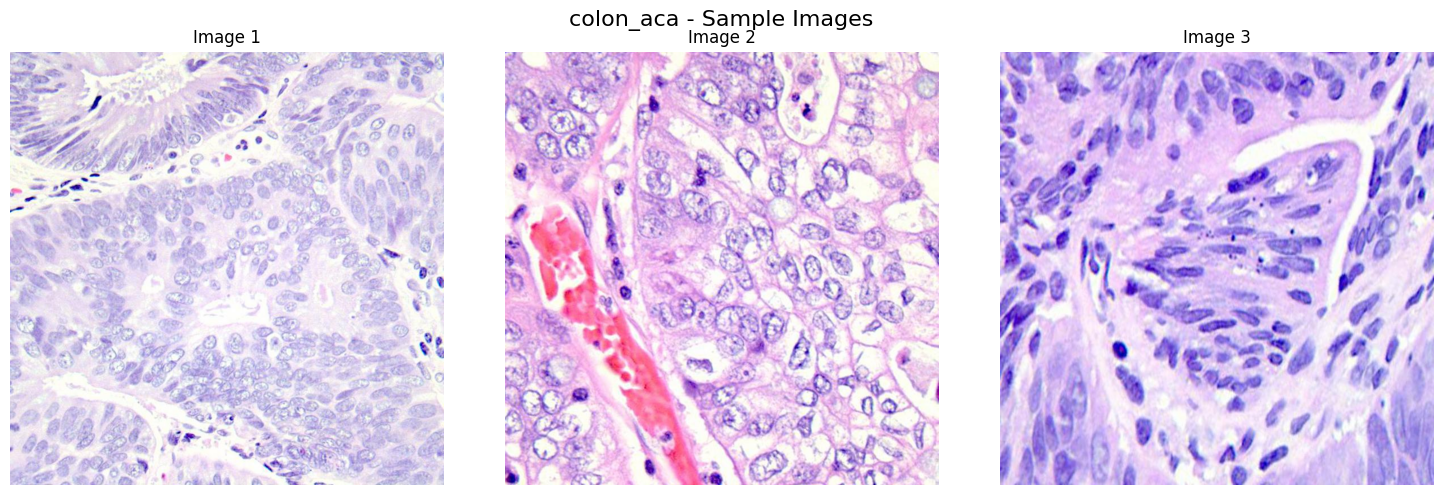

Number of colon_n images: 5000


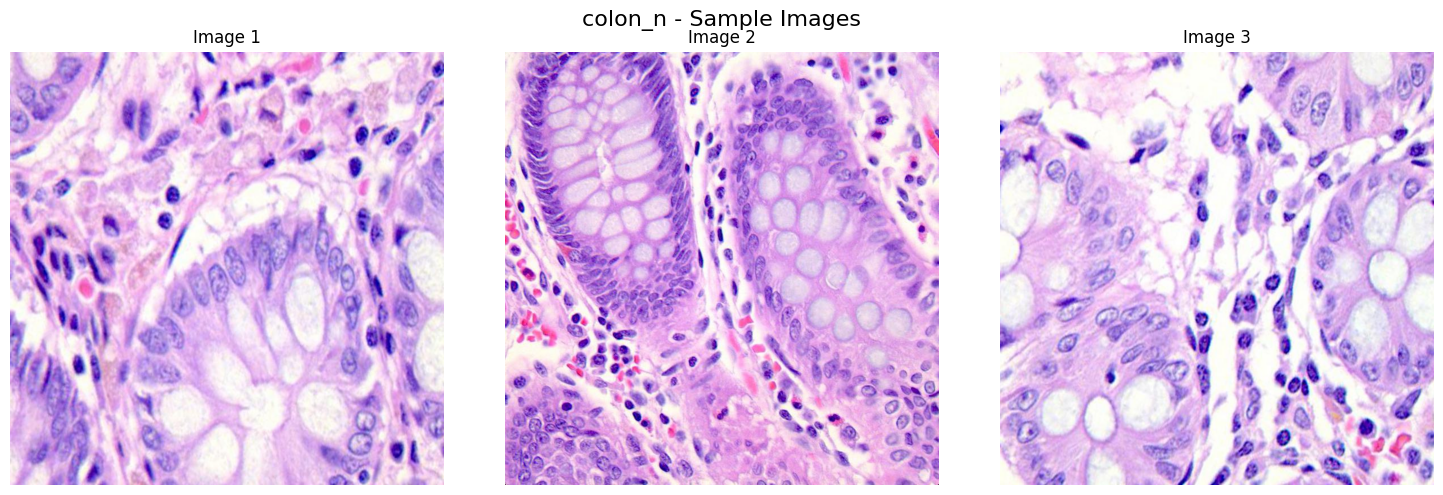

In [ ]:
# Set the dataset path and get the classes
path = 'lung_colon_image_set/colon_image_sets'
classes = os.listdir(path)

# Display sample images from each class
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
fig.suptitle('Sample Images from Dataset', fontsize=16)

# Loop over each subfolder and store all the images in images
for i, class_name in enumerate(classes):
    subfolder = f'{path}/{class_name}'
    images = os.listdir(subfolder)
    
    # show the images on matplotlib
    for j in range(3):
        random_idx = np.random.randint(0, len(images))
        image = np.array(Image.open(f'{subfolder}/{images[random_idx]}'))
        axes[i, j].imshow(image)
        axes[i, j].set_title(f'{class_name}')
        axes[i, j].axis('off')

plt.tight_layout()
plt.show()

In [15]:
# Define image size
img_size = 256

# Build CNN model
model = keras.models.Sequential([
    # First convolutional block
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', 
                  input_shape=(img_size, img_size, 3), padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(2, 2),
    layers.Dropout(0.25),

    # Second convolutional block
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(2, 2),
    layers.Dropout(0.25),

    # Third convolutional block
    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(2, 2),
    layers.Dropout(0.25),

    # Fourth convolutional block
    layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),
    layers.Dropout(0.25),

    # Flatten and dense layers
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    # Output layer
    layers.Dense(2, activation='softmax')
])

# Display model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 256, 256, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 256, 256, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 32, 32, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │    33,554,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 34,273,954 (130.74 MB)

 Trainable params: 34,271,458 (130.74 MB)

 Non-trainable params: 2,496 (9.75 KB)

In [16]:
# Training parameters
EPOCHS = 30
BATCH_SIZE = 32
IMG_SIZE = 256

# Custom callback to stop training if val_accuracy > 95%
class myCallBack(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs is not None and logs.get('val_accuracy') is not None and logs.get('val_accuracy') > 0.95:
            print('\nValidation accuracy has reached 95%, stopping training.')
            self.model.stop_training = True

# Early stopping callback
es = EarlyStopping(
    patience=5,
    monitor='val_accuracy',
    restore_best_weights=True,
    verbose=1
)

# Learning rate reduction callback
lr = ReduceLROnPlateau(
    patience=3,
    monitor='val_loss',
    factor=0.5,
    verbose=1,
    min_lr=1e-7
)

# Combine all callbacks
callbacks_list = [es, lr, myCallBack()]
print("Callbacks configured successfully!")

# Training data generator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode='nearest',
    validation_split=0.2
)

# Validation data generator
val_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# Create data generators
train_gen = train_datagen.flow_from_directory(
    'lung_colon_image_set/colon_image_sets',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_gen = val_datagen.flow_from_directory(
    'lung_colon_image_set/colon_image_sets',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

Callbacks configured successfully!
Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [ ]:
# Compile model
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS,
    callbacks=callbacks_list,
    verbose=1
)

Model compiled successfully!
Optimizer: Adam (lr=0.0001)
Loss function: categorical_crossentropy
Metrics: accuracy
Starting model training...
Training for maximum 30 epochs with batch size 32
Epoch 1/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 909s 4s/step - accuracy: 0.7991 - loss: 0.5884 - val_accuracy: 0.5000 - val_loss: 18.7406 - learning_rate: 1.0000e-04
Epoch 2/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 861s 3s/step - accuracy: 0.9031 - loss: 0.2673 - val_accuracy: 0.5000 - val_loss: 20.2857 - learning_rate: 1.0000e-04
Epoch 3/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 853s 3s/step - accuracy: 0.9376 - loss: 0.1727 - val_accuracy: 0.5000 - val_loss: 22.4820 - learning_rate: 1.0000e-04
Epoch 4/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 884s 4s/step - accuracy: 0.9525 - loss: 0.1360 - val_accuracy: 0.5025 - val_loss: 9.4977 - learning_rate: 1.0000e-04
Epoch 5/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 889s 4s/step - accuracy: 0.9620 - loss: 0.1060 - val_accuracy: 0.5050 - val_loss: 7.3314 - learning_rate: 1.0000e-04
Epoch 6/30
250/250 ━

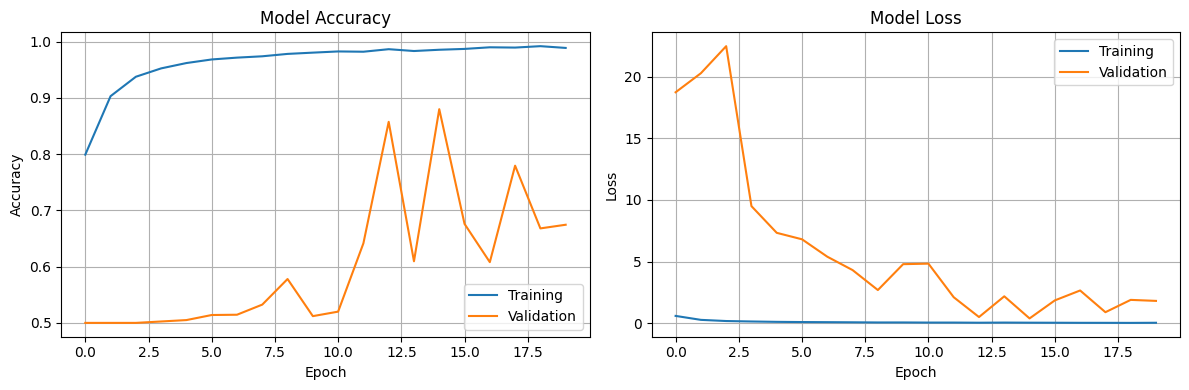

In [17]:
# Convert training history to DataFrame
history_df = pd.DataFrame(history.history)

# Create plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Accuracy plot
ax1.plot(history_df['accuracy'], label='Training')
ax1.plot(history_df['val_accuracy'], label='Validation')
ax1.set_title('Model Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.grid(True)

# Loss plot
ax2.plot(history_df['loss'], label='Training')
ax2.plot(history_df['val_loss'], label='Validation')
ax2.set_title('Model Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# Final evaluation
val_loss, val_acc = model.evaluate(val_gen, verbose=0)

# Generate predictions
val_gen.reset()
Y_pred = model.predict(val_gen, verbose=0)
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_true = val_gen.classes
class_labels = list(val_gen.class_indices.keys())

print("Classification Report:")
print(metrics.classification_report(Y_true, Y_pred_classes, target_names=class_labels))
print(f"\nFinal Validation Accuracy: {val_acc:.4f}")


Classification Report:
              precision    recall  f1-score   support

   colon_aca       0.81      1.00      0.89      1000
     colon_n       1.00      0.76      0.86      1000

    accuracy                           0.88      2000
   macro avg       0.90      0.88      0.88      2000
weighted avg       0.90      0.88      0.88      2000


Final Validation Accuracy: 0.8800
